# <center> ★ CUSTOMER SEGMENTATION AND SALE PREDICTION  ★

## Situation:
You are working as a Data Analyst in a company that sells cars. The company wants to find ways to marketing for existing customers effectively and new potential customers. Your manager gives you the dataset that includes every customer in 2019 with their financial attributes along with the sales.

Your tasks:

* Segment the customers based on theirs financial features and provide potential marketing strategies.

* Find new potential customers based on country current financial status, best is people who own one car or less

* Build a simple model to predict the sale amount

Objective:

* Understand the Dataset & cleanup (if required).
* Build a clustering model to cluster data based on their characteristics
* Build Regression models to predict car sales
* Also evaluate the models & compare their respective scores like MAE, MSE, R2, RMSE,.. etc

## DATASETS
This project includes two datasets:
1. The company customers dataset (in 2019)
2. The SCF data - Survey of Consumer Finances (in 2019) by BOARD OF GOVERNORS of the FEDERAL RESERVE SYSTEM

The DA's mission is to find individuals' financial features that match the company's interest and provide valuable insights

# IMPORT LIBRARIES

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from numpy import percentile
from scipy.stats.mstats import trimmed_var,trimmed_mean
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA PREPARATION

In [ ]:
#Load in data
df_scf = pd.read_csv(r"/content/drive/MyDrive/SCFP2019.csv")
df_data = pd.read_csv(r"/content/drive/MyDrive/Car_Purchasing_Data.csv")

In [ ]:
#View first 5 rows of SCF data
df_scf.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


In [ ]:
#View first 5 rows of company's data
df_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
#Check basic information of SCF data like null columns, column-types, number of columns,....
df_scf.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28885 entries, 0 to 28884
Data columns (total 351 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    YY1            28885 non-null  int64  
 1    Y1             28885 non-null  int64  
 2    WGT            28885 non-null  float64
 3    HHSEX          28885 non-null  int64  
 4    AGE            28885 non-null  int64  
 5    AGECL          28885 non-null  int64  
 6    EDUC           28885 non-null  int64  
 7    EDCL           28885 non-null  int64  
 8    MARRIED        28885 non-null  int64  
 9    KIDS           28885 non-null  int64  
 10   LF             28885 non-null  int64  
 11   LIFECL         28885 non-null  int64  
 12   FAMSTRUCT      28885 non-null  int64  
 13   RACECL         28885 non-null  int64  
 14   RACECL4        28885 non-null  int64  
 15   RACE           28885 non-null  int64  
 16   OCCAT1         28885 non-null  int64  
 17   OCCAT2         28885 non-null

In [ ]:
#Check basic information of company's data like null columns, column-types, number of columns,....
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [ ]:
#Choose columns where owncar <= 1 in SCF dataset since our target customer is people with <= 1 car
df_scf= df_scf[df_scf["OWN"] <= 1]
df_scf

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,5813,58131,667.098300,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4
28881,5813,58132,678.821856,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4
28882,5813,58133,640.908142,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4
28883,5813,58134,665.152072,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4


In [ ]:
#Choose columns match company's requirement
df_scf = df_scf[["HHSEX","AGE","INCOME","DEBT","NETWORTH"]]
#Rename columns for better interpretation
df_scf.rename(columns=
              {"INCOME": "Annual Salary","AGE":"Age","DEBT":"Credit Card Debt","NETWORTH":"Net Worth","HHSEX":"Gender"},
             inplace=True)

In [ ]:
#In SCF dictionary Gender is written as 1 and 2 where 1 is "Male" and 2 is "Female"
#I'm gonna change the value into 0(Male) and 1(Female) like our company's data for better translation during analysis
df_scf["Gender"] = df_scf["Gender"].replace({1 : 0 ,2 : 1},regex=False)
df_scf.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,1,75,67195.781504,0.0,2153600.0
1,1,75,57014.602488,0.0,2116200.0
2,1,75,51924.012980,0.0,2145000.0
3,1,75,41742.833964,0.0,2552500.0
4,1,75,50905.895078,0.0,2176200.0


In [ ]:
print("Number of rows",df_scf.shape[0])
print("Number of columns", df_scf.shape[1])
df_scf.head()

Number of rows 28885
Number of columns 5


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,1,75,67195.781504,0.0,2153600.0
1,1,75,57014.602488,0.0,2116200.0
2,1,75,51924.012980,0.0,2145000.0
3,1,75,41742.833964,0.0,2552500.0
4,1,75,50905.895078,0.0,2176200.0


In [ ]:
print("Number of rows:",df_data.shape[0])
print("Number of columns:",df_data.shape[1])
df_data.head()

Number of rows: 500
Number of columns: 9


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
#Drop duplicated rows and only keep the first duplicated row
print("Number of rows before drop duplicated rows: ",df_scf.shape[0])
print("Number of duplicated rows: ",df_scf.duplicated(keep=False).sum())
df_scf.drop_duplicates(keep='first',inplace=True)
print("Number of rows after drop duplicated rows: ", df_scf.shape[0])

Number of rows before drop duplicated rows:  28885
Number of duplicated rows:  7664
Number of rows after drop duplicated rows:  23983


In [ ]:
#Check variables in each column in SCF data to see if they're continuous, discrete or categorical
discrete_var = [x for x in df_scf.columns if df_scf[x].dtype != "O" and df_scf[x].nunique() < 10]
continuous_var = [x for x in df_scf.columns if df_scf[x].dtype != "O" and df_scf[x].nunique() >= 10]
catergorical_var = [x for x in df_scf.columns if df_scf[x].dtype == "O"]
print("Discrete variables columns: ",discrete_var)
print("Continous variables columns: ", continuous_var)
print("Catergorical variables columns: ", catergorical_var)

Discrete variables columns:  ['Gender']
Continous variables columns:  ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']
Catergorical variables columns:  []


In [ ]:
#Check variables in each column in company's data to see if they're continuous, discrete or categorical
discrete_var_data = [x for x in df_data.columns if df_data[x].dtype != "O" and df_data[x].nunique() < 10]
continuous_var_data = [x for x in df_data.columns if df_data[x].dtype != "O" and df_data[x].nunique() >= 10]
catergorical_var_data = [x for x in df_data.columns if df_data[x].dtype == "O"]
print("Discrete variables columns: ",discrete_var_data)
print("Continous variables columns: ", continuous_var_data)
print("Catergorical variables columns: ", catergorical_var_data)

Discrete variables columns:  ['Gender']
Continous variables columns:  ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']
Catergorical variables columns:  ['Customer Name', 'Customer e-mail', 'Country']


# EXPLORATORY DATA ANALYSIS

In [ ]:
#Create an Age Group column based on Age column
bins = [0,30,41,51,61,100]
labels = ["Under 30","30-40", "40-50","50-60","Over 60"]
def group_age_func(df,new_col,col):
    df[new_col] = pd.cut(x=df[col],bins=bins,labels=labels)
    return df

## Exploratory Data Analysis for SCF_data

In [ ]:
group_age_func(df_scf,"Age Group","Age")
df_scf.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Age Group
0,1,75,67195.781504,0.0,2153600.0,Over 60
1,1,75,57014.602488,0.0,2116200.0,Over 60
2,1,75,51924.012980,0.0,2145000.0,Over 60
3,1,75,41742.833964,0.0,2552500.0,Over 60
4,1,75,50905.895078,0.0,2176200.0,Over 60


Male      5905
Female    3343
Name: Gender, dtype: int64


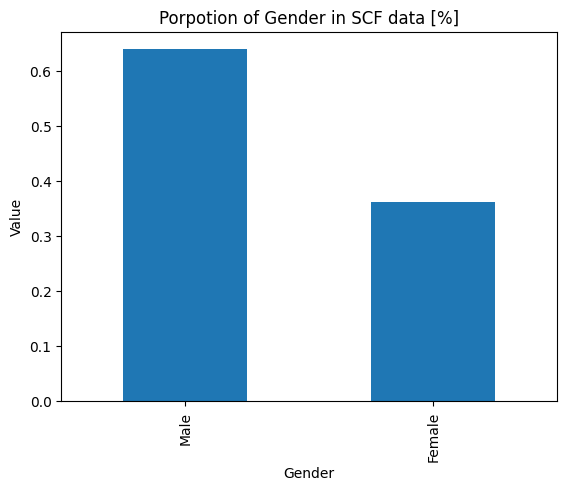

In [ ]:
#I want to check in the SCF dataset, which gender is most represented as we can use this to tailor our sale, marketing strategy
df_scf_gender = pd.DataFrame(df_scf["Gender"])
df_scf_gender["Gender"] = df_scf_gender["Gender"].replace({0:"Male",1:"Female"},regex=False)
print(df_scf_gender["Gender"].value_counts())
df_scf_gender["Gender"].value_counts(normalize=True).plot.bar()
plt.xlabel("Gender")
plt.ylabel("Value")
plt.title("Porpotion of Gender in SCF data [%]");

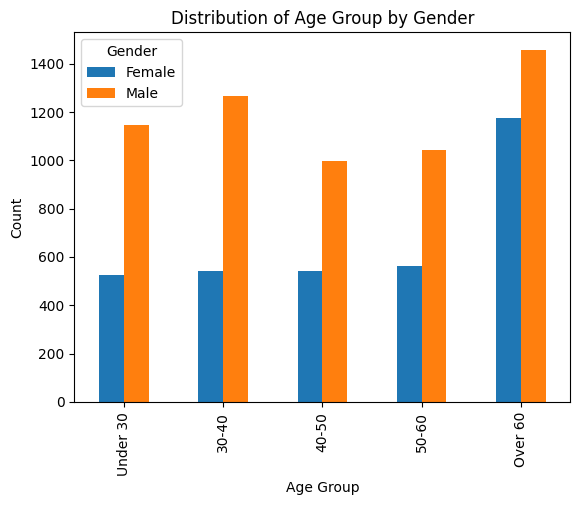

In [ ]:
#In the SCF data, men who don't own car or have only one car are high but unsteady in every age gap, while women are more steady in most of every age gap
#Except where both genders when reach over 60 are highest
df_scf_gender["Age Group"] = df_scf["Age Group"]
df_scf_gender.groupby(["Age Group","Gender"])["Gender"].count().unstack().plot.bar()
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Group by Gender");

In [ ]:
#Despite the fact that in the SCF data, where men are more by numbers than women, their credit card debt tends to be much lower comparing to women
df_scf_gender[["Annual Salary","Credit Card Debt","Net Worth"]] = df_scf[["Annual Salary","Credit Card Debt","Net Worth"]]
gender=df_scf_gender.groupby("Gender")["Annual Salary","Credit Card Debt","Net Worth"].mean()
fig = px.bar(
    gender,
    barmode="group",
    title="Mean Values by Gender"
)
fig.update_layout(xaxis_title="Age Group",yaxis_title="Value [$]")
fig.show()

In [ ]:
groupby_scf = df_scf_gender.groupby("Age Group")["Annual Salary","Credit Card Debt","Net Worth"].mean()
fig = px.bar(
    groupby_scf,
    orientation = "h",
    barmode="group",
    title="Mean Values by Age Group"
)
fig.update_layout(xaxis_title="Age Group",yaxis_title="Value [$]")
fig.show()

## Exploratory Data Analysis for Company data

In [ ]:
group_age_func(df_data,"Age Group","Age")
df_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Age Group
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,40-50
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,30-40
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,40-50
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,50-60
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,50-60


Female    253
Male      247
Name: Gender, dtype: int64


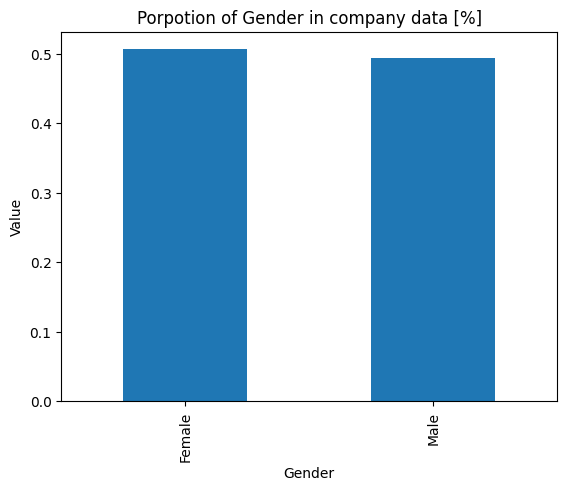

In [ ]:
#As we can see, our past customer gender is evenly distributed
df_data_gender = pd.DataFrame(df_data["Gender"])
df_data_gender["Gender"] = df_data_gender["Gender"].replace({0:"Male",1:"Female"},regex=False)
print(df_data_gender["Gender"].value_counts())
df_data_gender["Gender"].value_counts(normalize=True).plot.bar()
plt.xlabel("Gender")
plt.ylabel("Value")
plt.title("Porpotion of Gender in company data [%]");

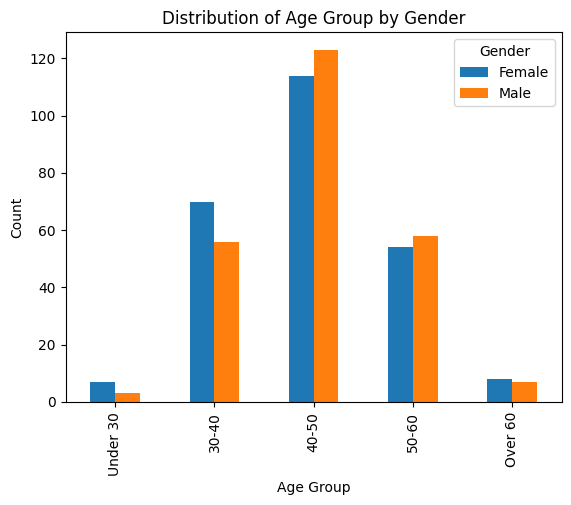

In [ ]:
#In our company data, numbers of male and female are not evenly distributed through every age gap. They reach their highest at 40-50
# This indicates most of out customers are from 40-50 years old
df_data_gender["Age Group"] = df_data["Age Group"]
df_data_gender.groupby(["Age Group","Gender"])["Gender"].count().unstack().plot.bar()
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age Group by Gender");

In [ ]:
# Our company data on the other hand, financial features based on genders to be balanced
df_data_gender[["Annual Salary","Credit Card Debt","Net Worth"]] = df_data[["Annual Salary","Credit Card Debt","Net Worth"]]
Gender=df_data_gender.groupby("Gender")["Annual Salary","Credit Card Debt","Net Worth"].mean()
fig = px.bar(
    Gender,
    barmode="group",
    title="Mean Values by Gender"
)
fig.update_layout(xaxis_title="Gender",yaxis_title="Value [$]")
fig.show()

In [ ]:
#
groupby_data = df_data.groupby("Age Group")["Annual Salary","Credit Card Debt","Net Worth"].mean()
fig = px.bar(
    groupby_data,
    orientation = "h",
    barmode="group",
    title="Mean Values by Cluster"
)
fig.update_layout(xaxis_title="Age Group",yaxis_title="Value [$]")
fig.show()

## Data Distribution

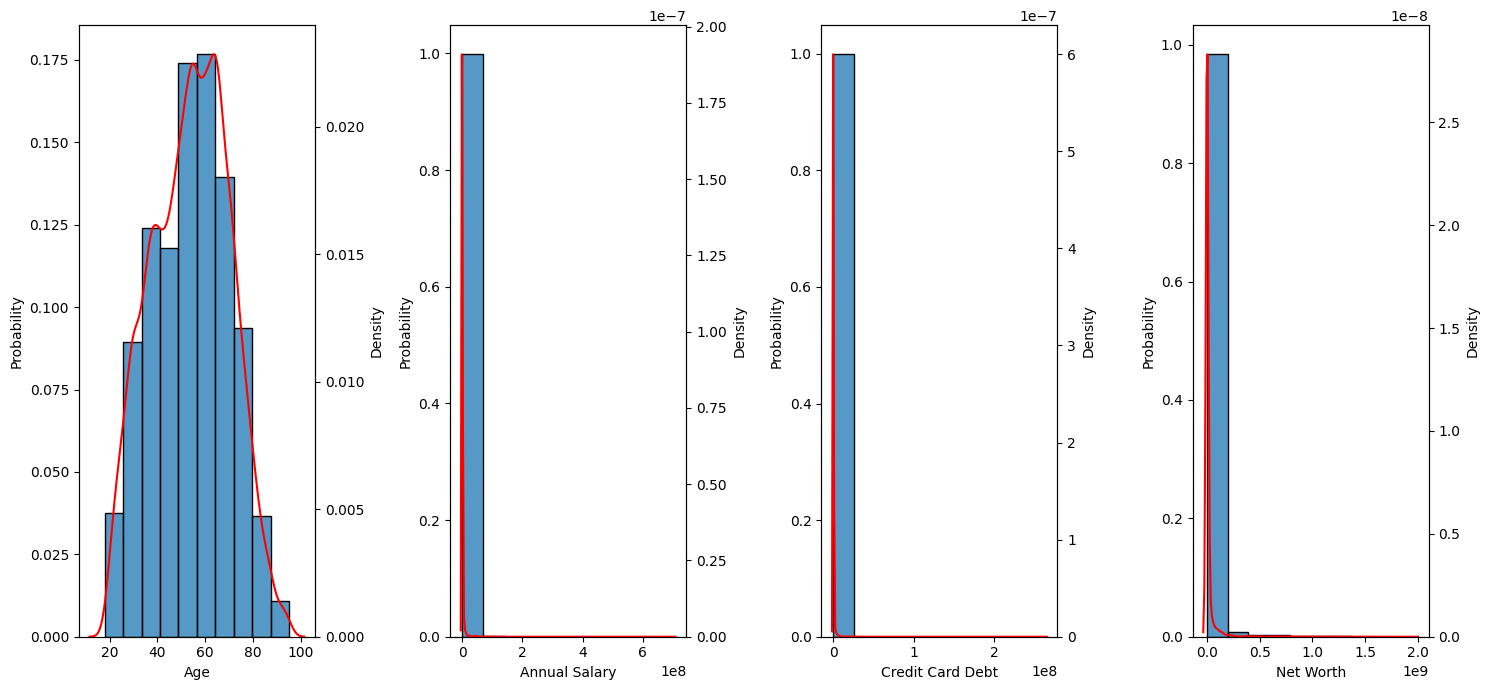

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(15,7))
axs = axs.flatten()
idx = 0
for v in continuous_var:
  sns.histplot(data=df_scf[v], ax=axs[idx], stat="probability", bins=10)
  sns.kdeplot(data=df_scf[v], ax=axs[idx].twinx(), color="red")
  idx += 1
plt.tight_layout()

In [ ]:
#Remove outliers
def remove_outliers_iqr(data, columns):
  for column in columns:
    q1 = data[column].quantile(.4)
    q3 = data[column].quantile(.6)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
  return data
df_scf = remove_outliers_iqr(df_scf, ['Annual Salary','Net Worth','Credit Card Debt'])

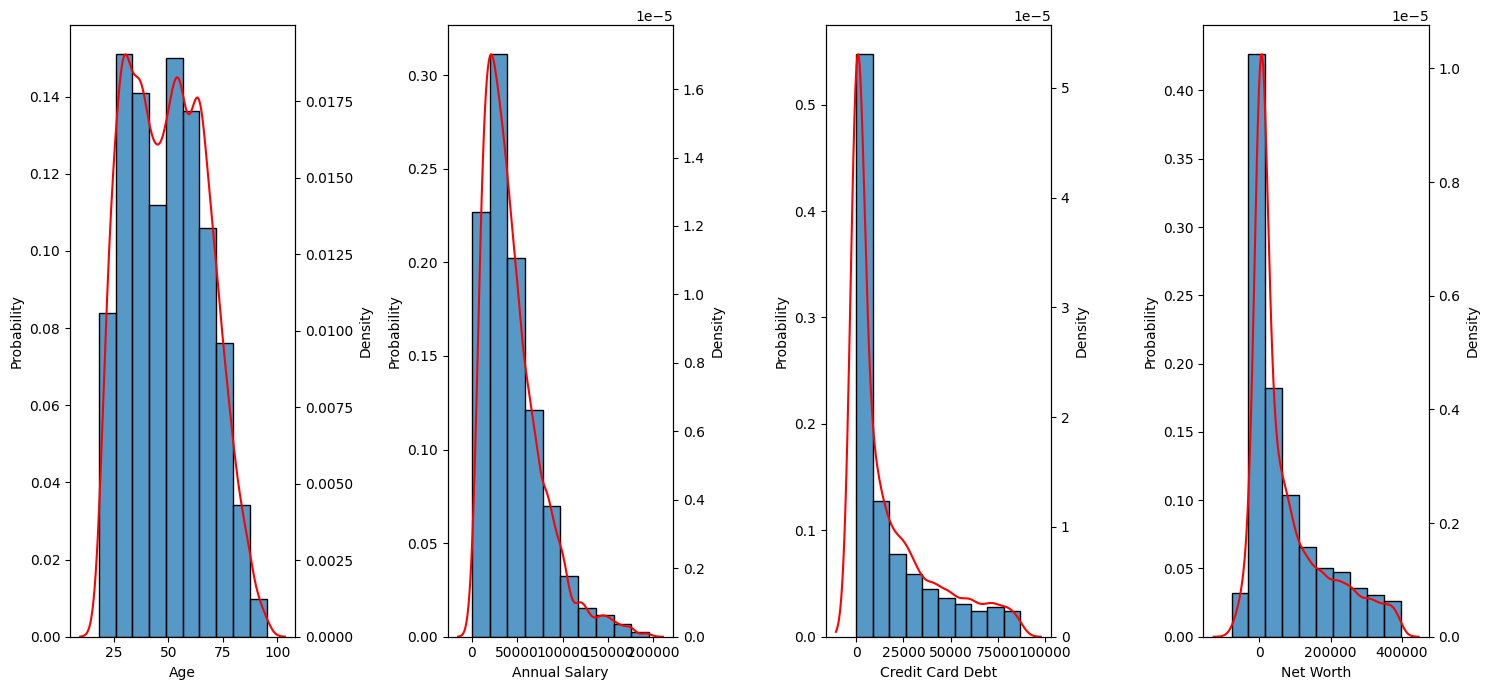

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(15,7))
axs = axs.flatten()
idx = 0
for v in continuous_var:
  sns.histplot(data=df_scf[v], ax=axs[idx], stat="probability", bins=10)
  sns.kdeplot(data=df_scf[v], ax=axs[idx].twinx(), color="red")
  idx += 1
plt.tight_layout()

In [ ]:
#See df_scf rows after cut outliers
df_scf.shape

(9248, 6)

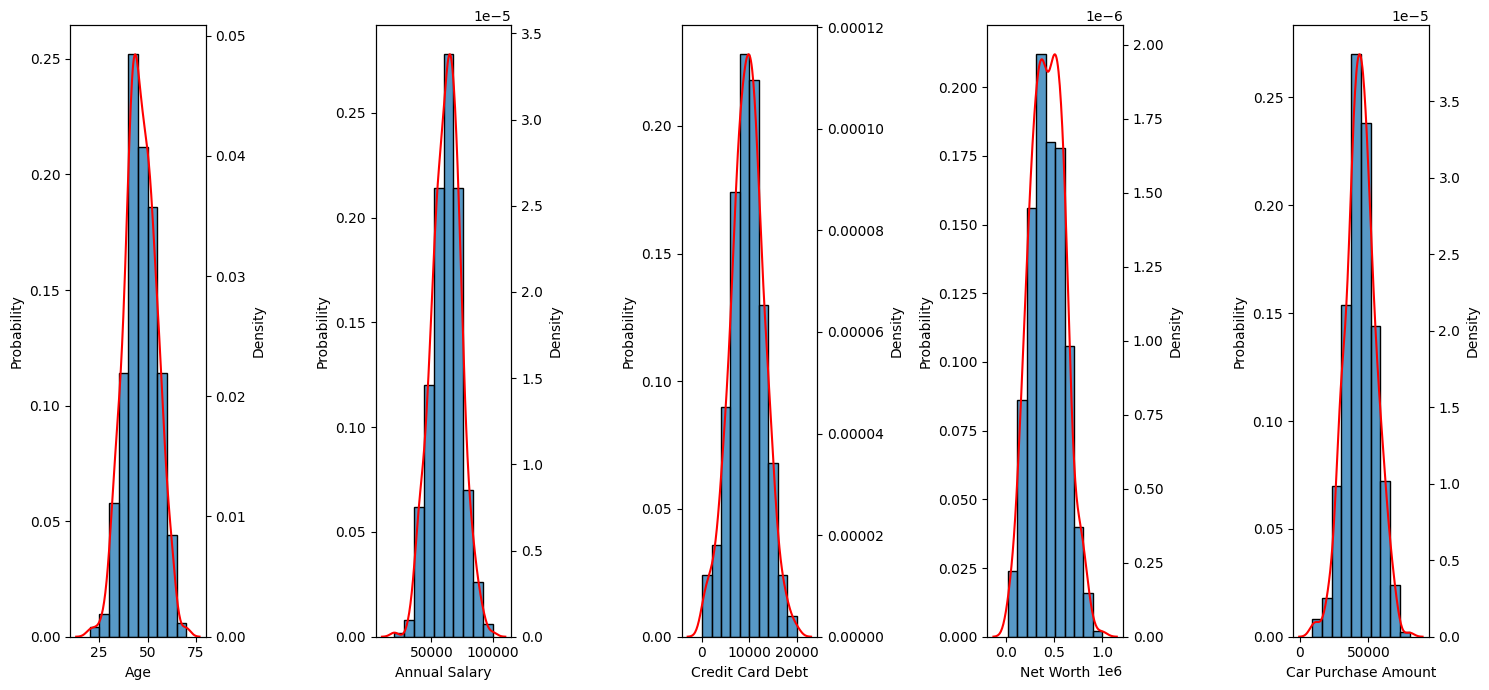

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(15,7))
axs = axs.flatten()
idx = 0
for v in continuous_var_data:
  sns.histplot(data=df_data[v], ax=axs[idx], stat="probability", bins=10)
  sns.kdeplot(data=df_data[v], ax=axs[idx].twinx(), color="red")
  idx += 1
plt.tight_layout()

# CLUSTERING

In [ ]:
X = df_scf.drop(columns=["Gender","Age Group"])
print("X shape:", X.shape)
X.head()

X shape: (9248, 4)


,Age,Annual Salary,Credit Card Debt,Net Worth
5,50,38688.480260,12200.0,-6710.0
6,50,37670.362358,12600.0,-4710.0
7,50,38688.480260,15300.0,-8115.0
8,50,38688.480260,14100.0,-2510.0
9,50,38688.480260,15400.0,-5715.0


In [ ]:
X_data = df_data.iloc[::,4:8]
print("X shape:", X_data.shape)
X_data.head()

X shape: (500, 4)


,Age,Annual Salary,Credit Card Debt,Net Worth
0,42,62812.09301,11609.380910,238961.2505
1,41,66646.89292,9572.957136,530973.9078
2,43,53798.55112,11160.355060,638467.1773
3,58,79370.03798,14426.164850,548599.0524
4,57,59729.15130,5358.712177,560304.0671


In [ ]:
ss = StandardScaler()

In [ ]:
# fit and transform of scaler on dataframe
df_scf_clean=pd.DataFrame(ss.fit_transform(X), columns = X.columns)

In [ ]:
df_scf_clean.head()

,Age,Annual Salary,Credit Card Debt,Net Worth
0,0.029553,-0.178181,-0.198969,-0.771231
1,0.029553,-0.210176,-0.181215,-0.751932
2,0.029553,-0.178181,-0.061379,-0.784788
3,0.029553,-0.178181,-0.114639,-0.730703
4,0.029553,-0.178181,-0.056940,-0.761629


In [ ]:
df_data_clean = pd.DataFrame(ss.fit_transform(X_data),columns = X_data.columns)

In [ ]:
df_data_clean.head()

,Age,Annual Salary,Credit Card Debt,Net Worth
0,-0.529168,0.058576,0.574271,-1.110469
1,-0.654444,0.386570,-0.009951,0.573929
2,-0.403891,-0.712361,0.445452,1.193976
3,1.475256,1.474794,1.382369,0.675595
4,1.349979,-0.205111,-1.218962,0.743113


In [ ]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model= KMeans(n_clusters=k,random_state=42)
    #train model
    model.fit(df_scf_clean)
    #Calculate inertia
    inertia_errors.append(model.inertia_)
    #Calculate silhouettte score
    silhouette_scores.append(
        silhouette_score(df_scf_clean,model.labels_)
    )

print("Inertia:", inertia_errors[:4])
print()
print("Silhouette Scores:", silhouette_scores[:4])

Inertia: [27079.743270231793, 21185.327845820175, 16854.244166728255, 13993.472611719937]

Silhouette Scores: [0.33985274555921113, 0.2838122519570827, 0.3007862185953735, 0.31779800766236355]


Text(0.5, 1.0, 'Elbow Method For Optimal k')

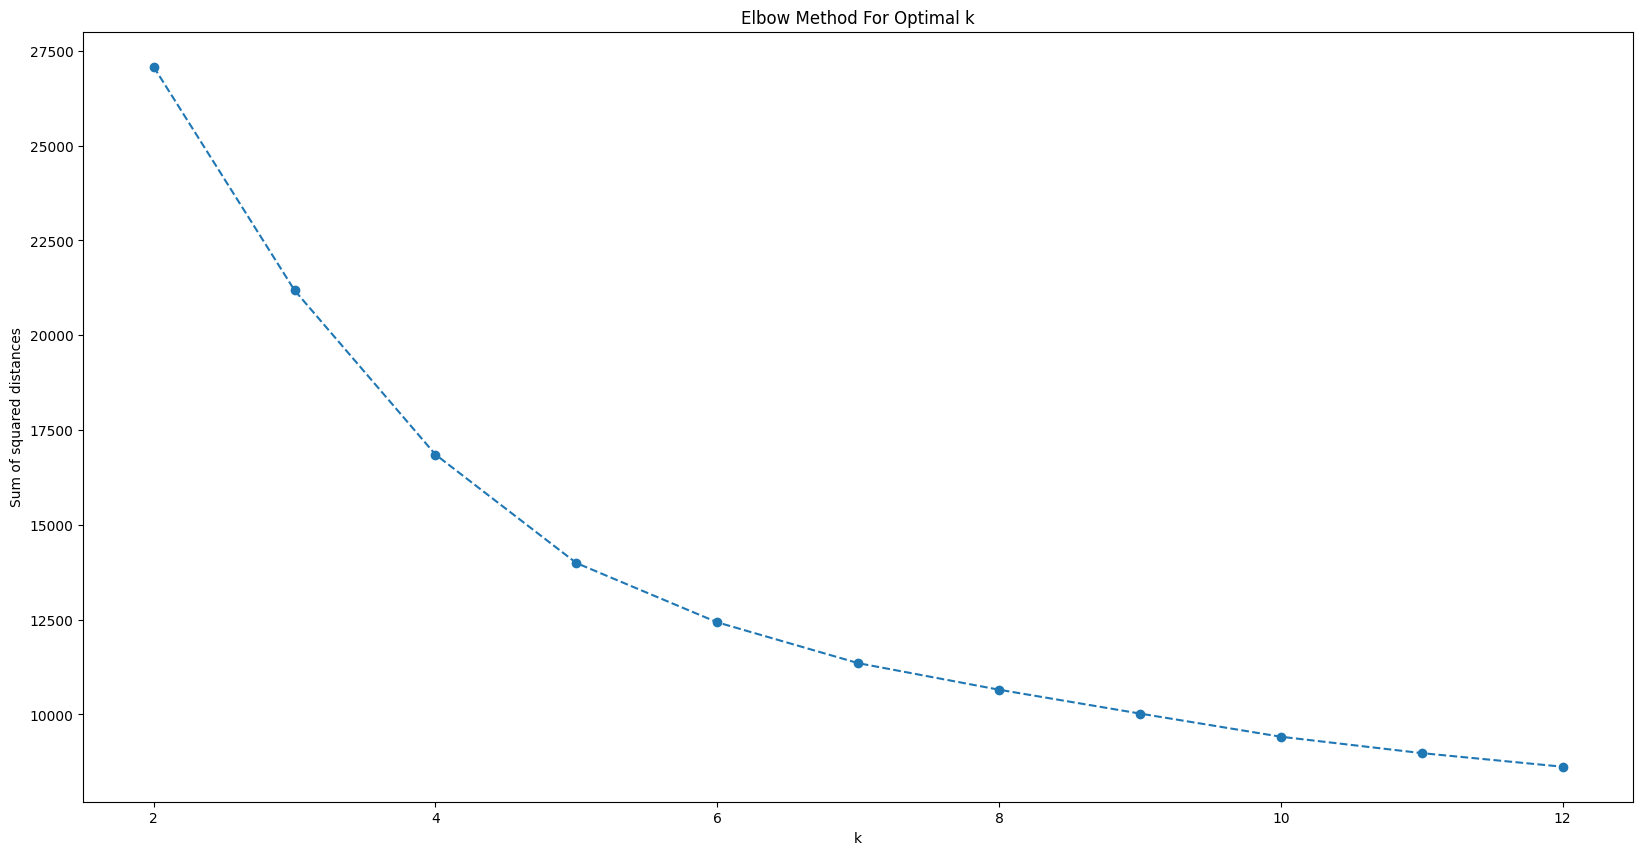

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(n_clusters, inertia_errors, 'o--')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

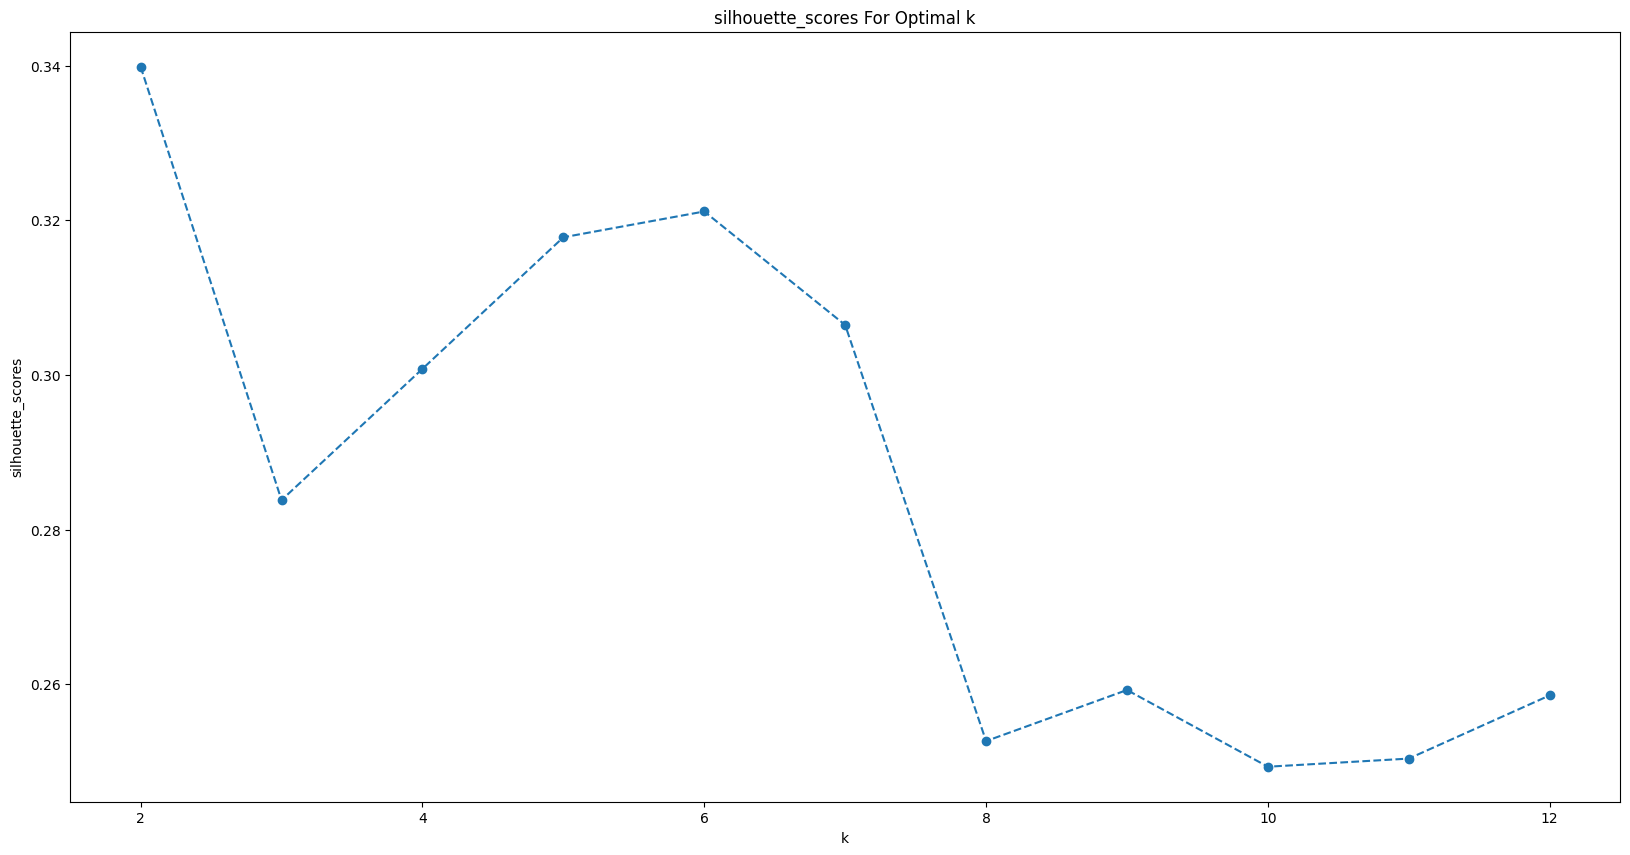

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(n_clusters, silhouette_scores, 'o--')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.title('silhouette_scores For Optimal k');

In [ ]:
model = KMeans(n_clusters = 6,random_state=42)
model.fit(df_scf_clean)

KMeans(n_clusters=6, random_state=42)

In [ ]:
df_scf_predict = model.predict(df_scf_clean)

In [ ]:
df_data_predict = model.predict(df_data_clean)

In [ ]:
scf_clustered=pd.DataFrame(df_scf_predict, columns=["cluster"])
data_clustered=pd.DataFrame(df_data_predict, columns=["cluster"])

In [ ]:
df_scf['clustered'] = df_scf_predict

In [ ]:
df_data['clustered'] = df_data_predict

In [ ]:
df_scf_clean["clustered"] = df_scf_predict

In [ ]:
df_scf.groupby("clustered").mean()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
clustered,,,,,
0,0.479127,63.688229,25899.372520,6238.003009,34281.478375
1,0.395303,42.922701,44007.100284,55917.123288,14913.562622
2,0.132797,41.871227,103384.229213,15813.159960,88405.780684
3,0.337790,67.299465,46392.937756,6790.659537,264370.139929
4,0.208955,55.245439,77335.763045,61591.434494,224478.839138
5,0.360955,32.987360,33333.376714,7047.880267,17846.843048


In [ ]:
df_data.groupby("clustered").mean()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
clustered,,,,,,
0,0.456000,52.824000,56570.709118,8324.922218,359606.632618,44512.980392
1,0.554054,45.337838,61691.462297,14100.291356,354509.576636,41014.493270
2,0.375000,43.861111,78373.872755,9132.757238,439678.926637,51602.112035
3,0.485714,51.200000,62765.700712,8316.639942,667943.605066,55597.079352
4,0.500000,49.227273,66274.122403,14933.469167,645407.957595,55269.481544
5,0.605839,38.897810,57901.929730,8405.299620,379134.371712,34179.768927


In [ ]:
XGB=df_scf_clean.groupby("clustered").mean()

In [ ]:
df_data_clean['clustered'] = df_data_predict

In [ ]:
xgb=df_data_clean.groupby("clustered").mean()

In [ ]:
clusters=pd.DataFrame(data={'scf_clusters': (scf_clustered["cluster"].value_counts().sort_index().values/scf_clustered.shape[0]),
 'data_clusters': (data_clustered["cluster"].value_counts().sort_index().values/data_clustered.shape[0])})
clusters

,scf_clusters,data_clusters
0,0.287522,0.250
1,0.110510,0.148
2,0.107483,0.144
3,0.121324,0.140
4,0.065203,0.044
5,0.307958,0.274


In [ ]:
fig = px.bar(
    XGB,
    barmode="group",
    title="Mean Values by Cluster"
)
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]",autosize=True)
fig.show()

In [ ]:
fig = px.bar(
    xgb,
    barmode="group",
    title="Mean Values by Cluster"
)
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]",autosize=True)

fig.show()

<Axes: >

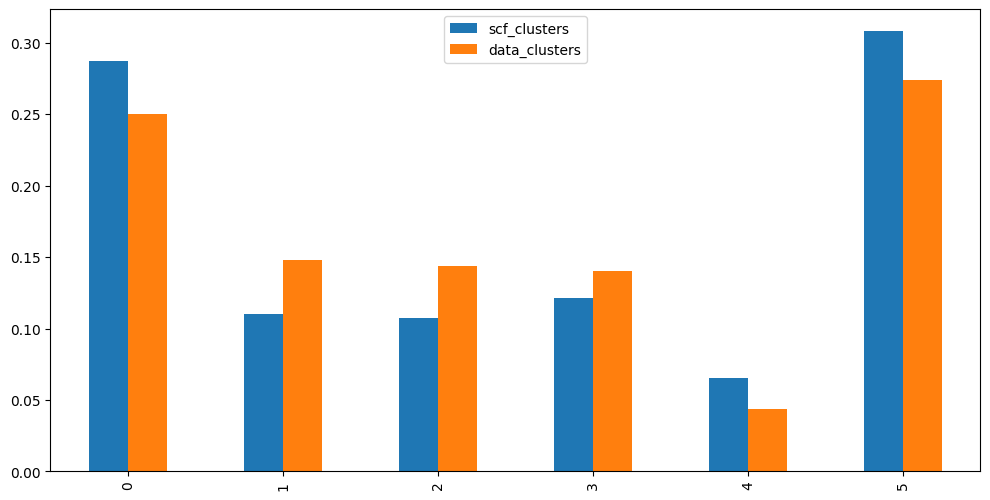

In [ ]:
clusters.plot(kind="bar", figsize=[12,6])

## Conclusion

KMean determined which cluster each customer's observation belonged to after categorizing the overall population into 6 separate groups. Following that, the distribution of the clusters in the general and customer populations may be compared.

As we can see cluster 1, 2, 3 are underrepresented

Our customers come mostly from cluster 0 and 5.

**Cluster 0** represents customer that are in boomer generation and solid financial status, they like honest and clear messaging, clear paths to purchasing, email marketing campaigns, customer service, offers and social media. I suggest Traditional advertising; loyalty programs; word of mouth, email and social marketing; and incentives.

**Cluster 5** represents middle income millennials, we could try influencer marketing, reviews, videos, TikTok, Instagram, Snapchat, YouTube, mobile interactions, and social selling and advertising.Testimonial and influencer marketing, short videos, social and economic causes, and apps on smartphones.

**Potential customer**: If the company want to target potential customers based on country current financial status, from what the model segment, they mainly come from cluster 0, 5 also. I suggest a pay-in-installments, or having special offers for first-time buyers,...

**CALL TO ACTION**

The base core customer represents a smaller portion of the population when it comes to the income, age, or social classes analysis, even though there is a clear profile indicating specific segments of the population that are more likely to become customers of the company.

It could also be seen as a great opportunity for the company to promote different marketing strategies, launched different and more affordable of the current products that could be, for example, purchased by people with lower incomes.

At the same time, it’s possible to reach out to younger people that are especially concerned about environmentalism issues, investing in directed marketing campaigns that speak with these new generations. They could potentially become customers for a lifetime.

# PREDICTIVE MODELING

In [ ]:
df_data_build = df_data
df_data_build

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Age Group,clustered
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,40-50,5
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,30-40,5
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,40-50,3
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,50-60,4
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,50-60,3
...,...,...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342,30-40,2
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457,30-40,5
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888,50-60,3
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353,50-60,0


In [ ]:
df_data_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Customer Name        500 non-null    object  
 1   Customer e-mail      500 non-null    object  
 2   Country              500 non-null    object  
 3   Gender               500 non-null    int64   
 4   Age                  500 non-null    int64   
 5   Annual Salary        500 non-null    float64 
 6   Credit Card Debt     500 non-null    float64 
 7   Net Worth            500 non-null    float64 
 8   Car Purchase Amount  500 non-null    float64 
 9   Age Group            500 non-null    category
 10  clustered            500 non-null    int32   
dtypes: category(1), float64(4), int32(1), int64(2), object(3)
memory usage: 37.9+ KB


In [ ]:
#Drop columns with high cardinality
df_data_build.drop(columns = ["Customer Name","Customer e-mail", "Country","Age Group",'clustered'],inplace=True)

In [ ]:
#Set target variable, split feature and target
target = "Car Purchase Amount"
X = df_data_build.drop(columns=target)
y = df_data_build[target]

In [ ]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
XT = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
XT = pd.DataFrame(XT,columns=X.columns)

print("X_scaled shape:", XT.shape)
XT.head()

X_scaled shape: (500, 5)


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,-1.012073,-0.529168,0.058576,0.574271,-1.110469
1,-1.012073,-0.654444,0.386570,-0.009951,0.573929
2,0.988071,-0.403891,-0.712361,0.445452,1.193976
3,0.988071,1.475256,1.474794,1.382369,0.675595
4,0.988071,1.349979,-0.205111,-1.218962,0.743113


In [ ]:
#Split data into train and test parts
XT_train, XT_test, y_train, y_test = train_test_split(XT, y, test_size=0.2, random_state=42)

print("X_train shape:", XT_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", XT_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 5)
y_train shape: (400,)
X_test shape: (100, 5)
y_test shape: (100,)


In [ ]:
from sklearn import linear_model
model_reg = {
    "Linear Regression":linear_model.LinearRegression(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

In [ ]:
for name,model in model_reg.items():
    model.fit(XT_train,y_train)
    print(name, " trained")

Linear Regression  trained
SVR  trained
KNN  trained
Decision Tree Regressor  trained
Random Forest Regressor  trained


In [ ]:
y_pred_baseline=[y_train.mean()]*len(y_train)
Baselinemae=mean_absolute_error(y_train,y_pred_baseline)
print("MAE: ",Baselinemae)

MAE:  8464.184212943625


In [ ]:
#calculate metrics for train part
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae10,msq10,rmq10 = [],[],[]
for name,model in model_reg.items():
    y_pred=model.predict(XT_train)
    mae10.append(mean_absolute_error(y_train, y_pred))
    msq10.append(mean_squared_error(y_train, y_pred))
    rmq10.append(np.sqrt(mean_squared_error(y_train, y_pred)))

In [ ]:
modelmetrics = pd.DataFrame({"Mean Absolute Error" : mae10,"Mean Squared Error" : msq10,"Root Mean Squared Error" : rmq10},
                              index=["Linear Regression","SVR","KNR","Decision Tree","Random Forest"])
modelmetrics

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Linear Regression,205.481684,5.683590e+04,238.402804
SVR,8447.433319,1.170636e+08,10819.594080
KNR,2137.548293,8.526565e+06,2920.028285
Decision Tree,0.000000,0.000000e+00,0.000000
Random Forest,678.087205,1.017632e+06,1008.777318


In [ ]:
#Calculate metrics for test part
mae1,msq1,rmq1 = [],[],[]
for name,model in model_reg.items():
    y_pred=model.predict(XT_test)
    mae1.append(mean_absolute_error(y_test, y_pred))
    msq1.append( mean_squared_error(y_test, y_pred))
    rmq1.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
modelmetrics = pd.DataFrame({"Mean Absolute Error" : mae1,"Mean Squared Error" : msq1,"Root Mean Squared Error" : rmq1},
                              index=["Linear Regression","SVR","KNR","Decision Tree","Random Forest"])
modelmetrics

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Linear Regression,212.721031,6.225397e+04,249.507447
SVR,8411.754293,1.094703e+08,10462.804388
KNR,2669.846833,1.144236e+07,3382.656238
Decision Tree,2826.487042,1.275576e+07,3571.520845
Random Forest,1565.667271,5.098226e+06,2257.925144


Linear Regression and Decision Tree are 2 overfitting models, SVR MAE is too high compare to other models

In [ ]:
#Set hyperparameter
decision_tree_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["friedman_mse", "'absolute_error"]
},
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
},
knn_params = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance']
}


In [ ]:
#Initiate RamdomizedSearchCV for hyperparameter tuning
decis_tree= RandomizedSearchCV(DecisionTreeRegressor(random_state=42),param_distributions=decision_tree_params,n_iter=10,cv=2,n_jobs=-1,verbose=1)
rand_for= RandomizedSearchCV(RandomForestRegressor(random_state=42),param_distributions=random_forest_params,n_iter=10,cv=2,n_jobs=-1,verbose=1)
knn_clf=RandomizedSearchCV(KNeighborsRegressor(),param_distributions=knn_params,n_iter=10,cv=2,n_jobs=-1,verbose=1)

In [ ]:
model_reg_hp=[decis_tree,rand_for,knn_clf]
for model in model_reg_hp:
  model.fit(XT_train,y_train)
  print(name , "trained")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Random Forest Regressor trained
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Random Forest Regressor trained
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Random Forest Regressor trained


In [ ]:
mae,msq,rmq = [],[],[]

for model in model_reg_hp:
  y_pred=model.predict(XT_test)
  mae.append(mean_absolute_error(y_test, y_pred))
  msq.append(mean_squared_error(y_test, y_pred))
  rmq.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
modelmetricshp = pd.DataFrame({"Mean Absolute Error" : mae,"Mean Squared Error" : msq,"Root Mean Squared Error" : rmq},
                              index=["Decision Tree","Random Forest","KNR"])
modelmetricshp

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Decision Tree,3048.515997,1.413892e+07,3760.175301
Random Forest,1598.085645,5.264578e+06,2294.466780
KNR,2475.263407,1.022123e+07,3197.065437


After setting hyperparmeter, Random Forest has the lowest MAE score.
Which suggests is the best model for predicting Car Purchase Amount

In [ ]:
predicted = model_reg_hp[1].predict(XT_test)

In [ ]:
plot_predict = pd.DataFrame({"Predicted Values": predicted, "Actual values": y_test})

In [ ]:
plot_predict.reset_index(drop=True)

,Predicted Values,Actual values
0,46197.996353,46082.80993
1,45567.343665,45058.89690
2,64630.737722,63079.84329
3,35476.116917,31837.22537
4,56540.871264,60461.24268
...,...,...
95,47645.996538,49079.29461
96,44538.135027,45167.32542
97,50119.450923,50958.08115
98,42400.364583,43898.27330


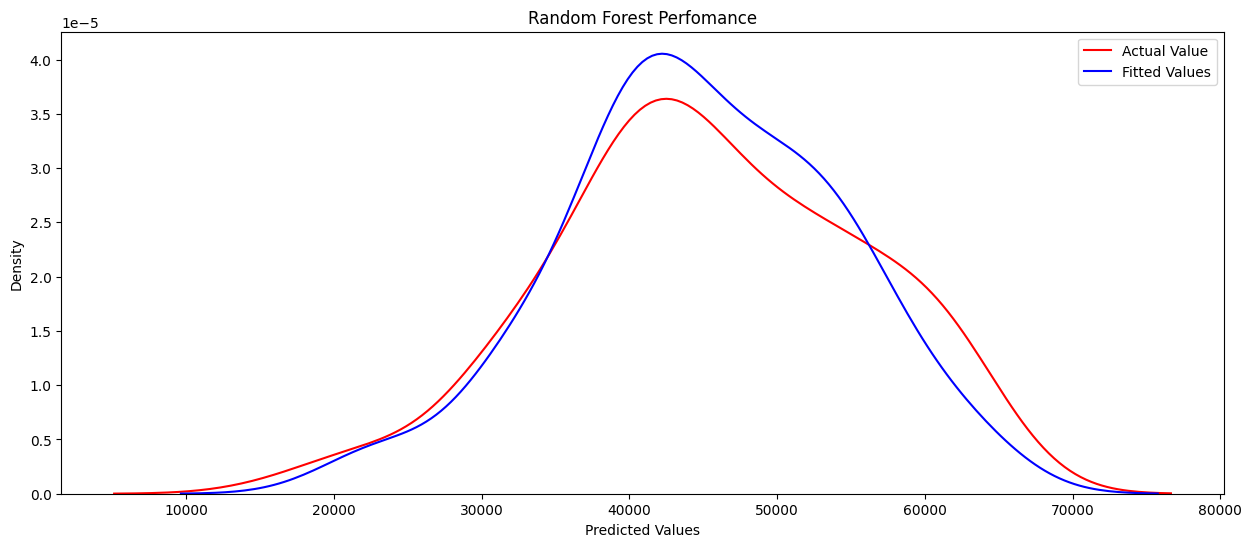

In [ ]:
#plot predicting value vs actual value on test set
plt.figure(figsize=(15, 6))


ax1 = sns.distplot(plot_predict['Actual values'], hist=False, color="r", label="Actual Value")
sns.distplot(plot_predict["Predicted Values"], hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Random Forest Perfomance')
plt.legend()

plt.show()

## Conclusion

I use the company dataset to train and test purposes. My predict variable is the " Car Purchase Amount", and input variable will be the customers' financial attributes.

The models I used for training and testing are :

Linear Regression

SVM

KNR

Decision Tree

Random Forest

After traning and evaluating, I decided to use three models Random Forest, Decision Tree, KNR for hyperparameter tuning

**Random Forest** is the best model for this prediction since it has better MAE compared to the other two models.

This plot shows how well the Random Forest predict the sales amount compared to the actual values.